## ST

In [28]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pysodb

In [30]:
sc.set_figure_params(vector_friendly=False,format='pdf',transparent=True,dpi=50)
plt.rcParams["figure.figsize"] = (8, 8)

sns.set_style('white')

#### load data using pysodb

In [31]:
sodb = pysodb.SODB() # Initialization

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/urllib3-1.26.12-py3.9.egg/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gene.ai.tencent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# this dataset is from publication "Visualization and analysis of gene expression in tissue sections by spatial transcriptomics"

In [ ]:
# link in SODB: https://gene.ai.tencent.com/SpatialOmics/dataset?datasetID=22

In [34]:
adata = sodb.load_experiment('stahl2016visualization','Rep4_MOB_trans')
# the first parameter is the name of the dataset
# the second parameter is the name of one experiment in the dataset

load experiment[Rep4_MOB_trans] in dataset[stahl2016visualization] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/stahl2016visualization/Rep4_MOB_trans.h5ad


#### identify clusters

In [35]:
sc.pp.log1p(adata)

In [36]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

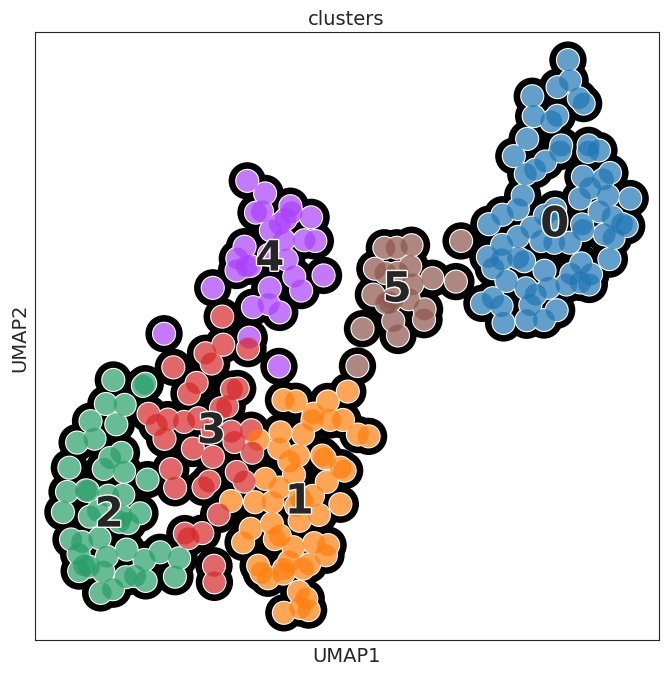

In [44]:
sc.pl.umap(adata, color=[ "clusters"], wspace=0.4,
          add_outline=True,legend_fontsize=30, legend_fontoutline=2,
            legend_loc='on data',
            s=1000
          )

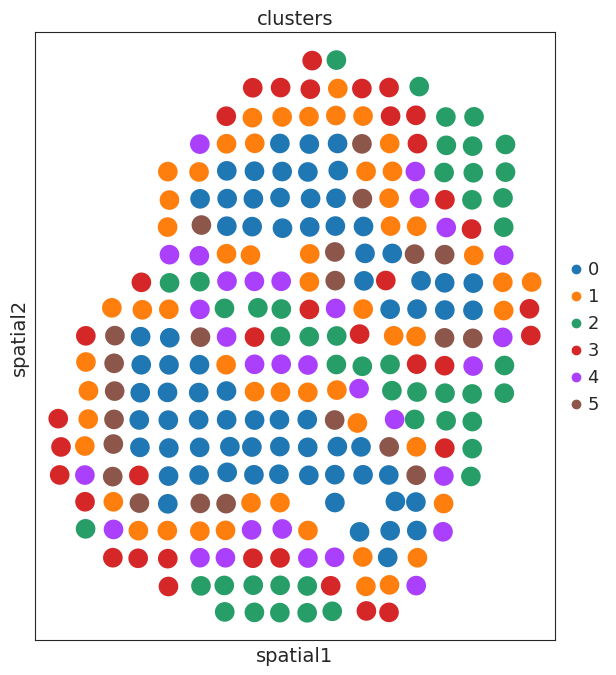

In [45]:
# plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.embedding(adata, basis='spatial', color=['clusters'],show=False,size=800,add_outline=False)
plt.gca().set_aspect('equal', adjustable='box')

#### marker gene detection

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


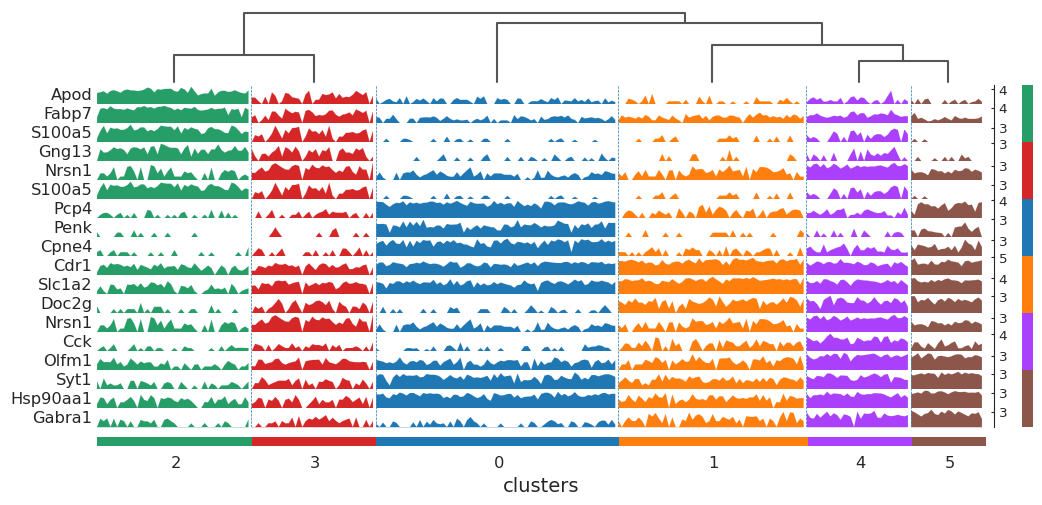

In [39]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=3, groupby="clusters")

In [40]:
adata

AnnData object with n_obs × n_vars = 264 × 11106
    obs: 'leiden', 'clusters'
    var: 'ensemble', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap', 'clusters_colors', 'rank_genes_groups', 'dendrogram_clusters'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [41]:
marker_genes = adata.uns['rank_genes_groups']['names'][0]

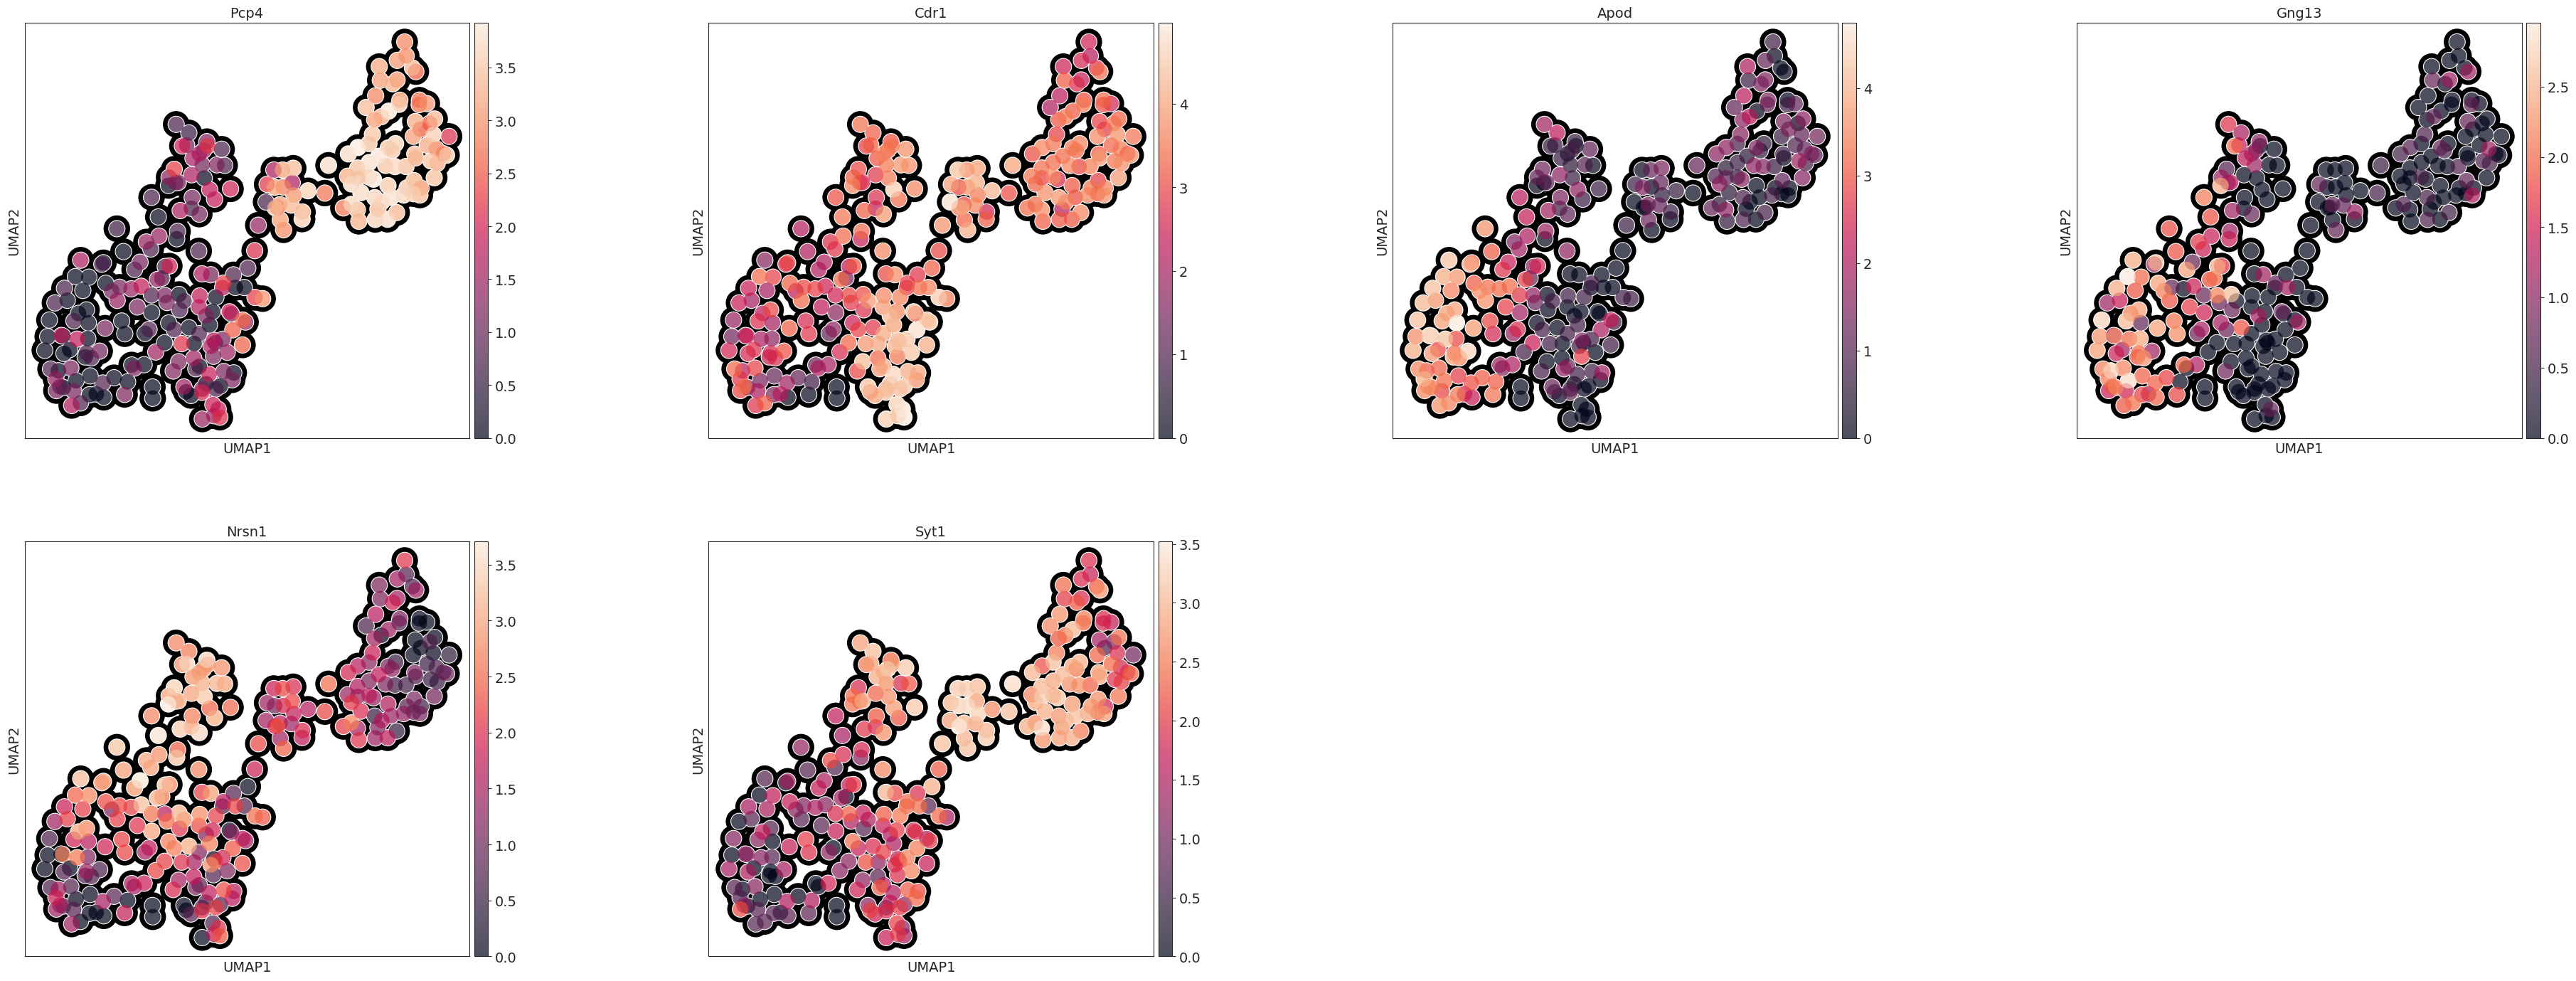

In [46]:
sc.pl.umap(adata, color=marker_genes, wspace=0.4,
          add_outline=True,legend_fontsize=10, legend_fontoutline=2,
            legend_loc='on data',
            s=1000
          )

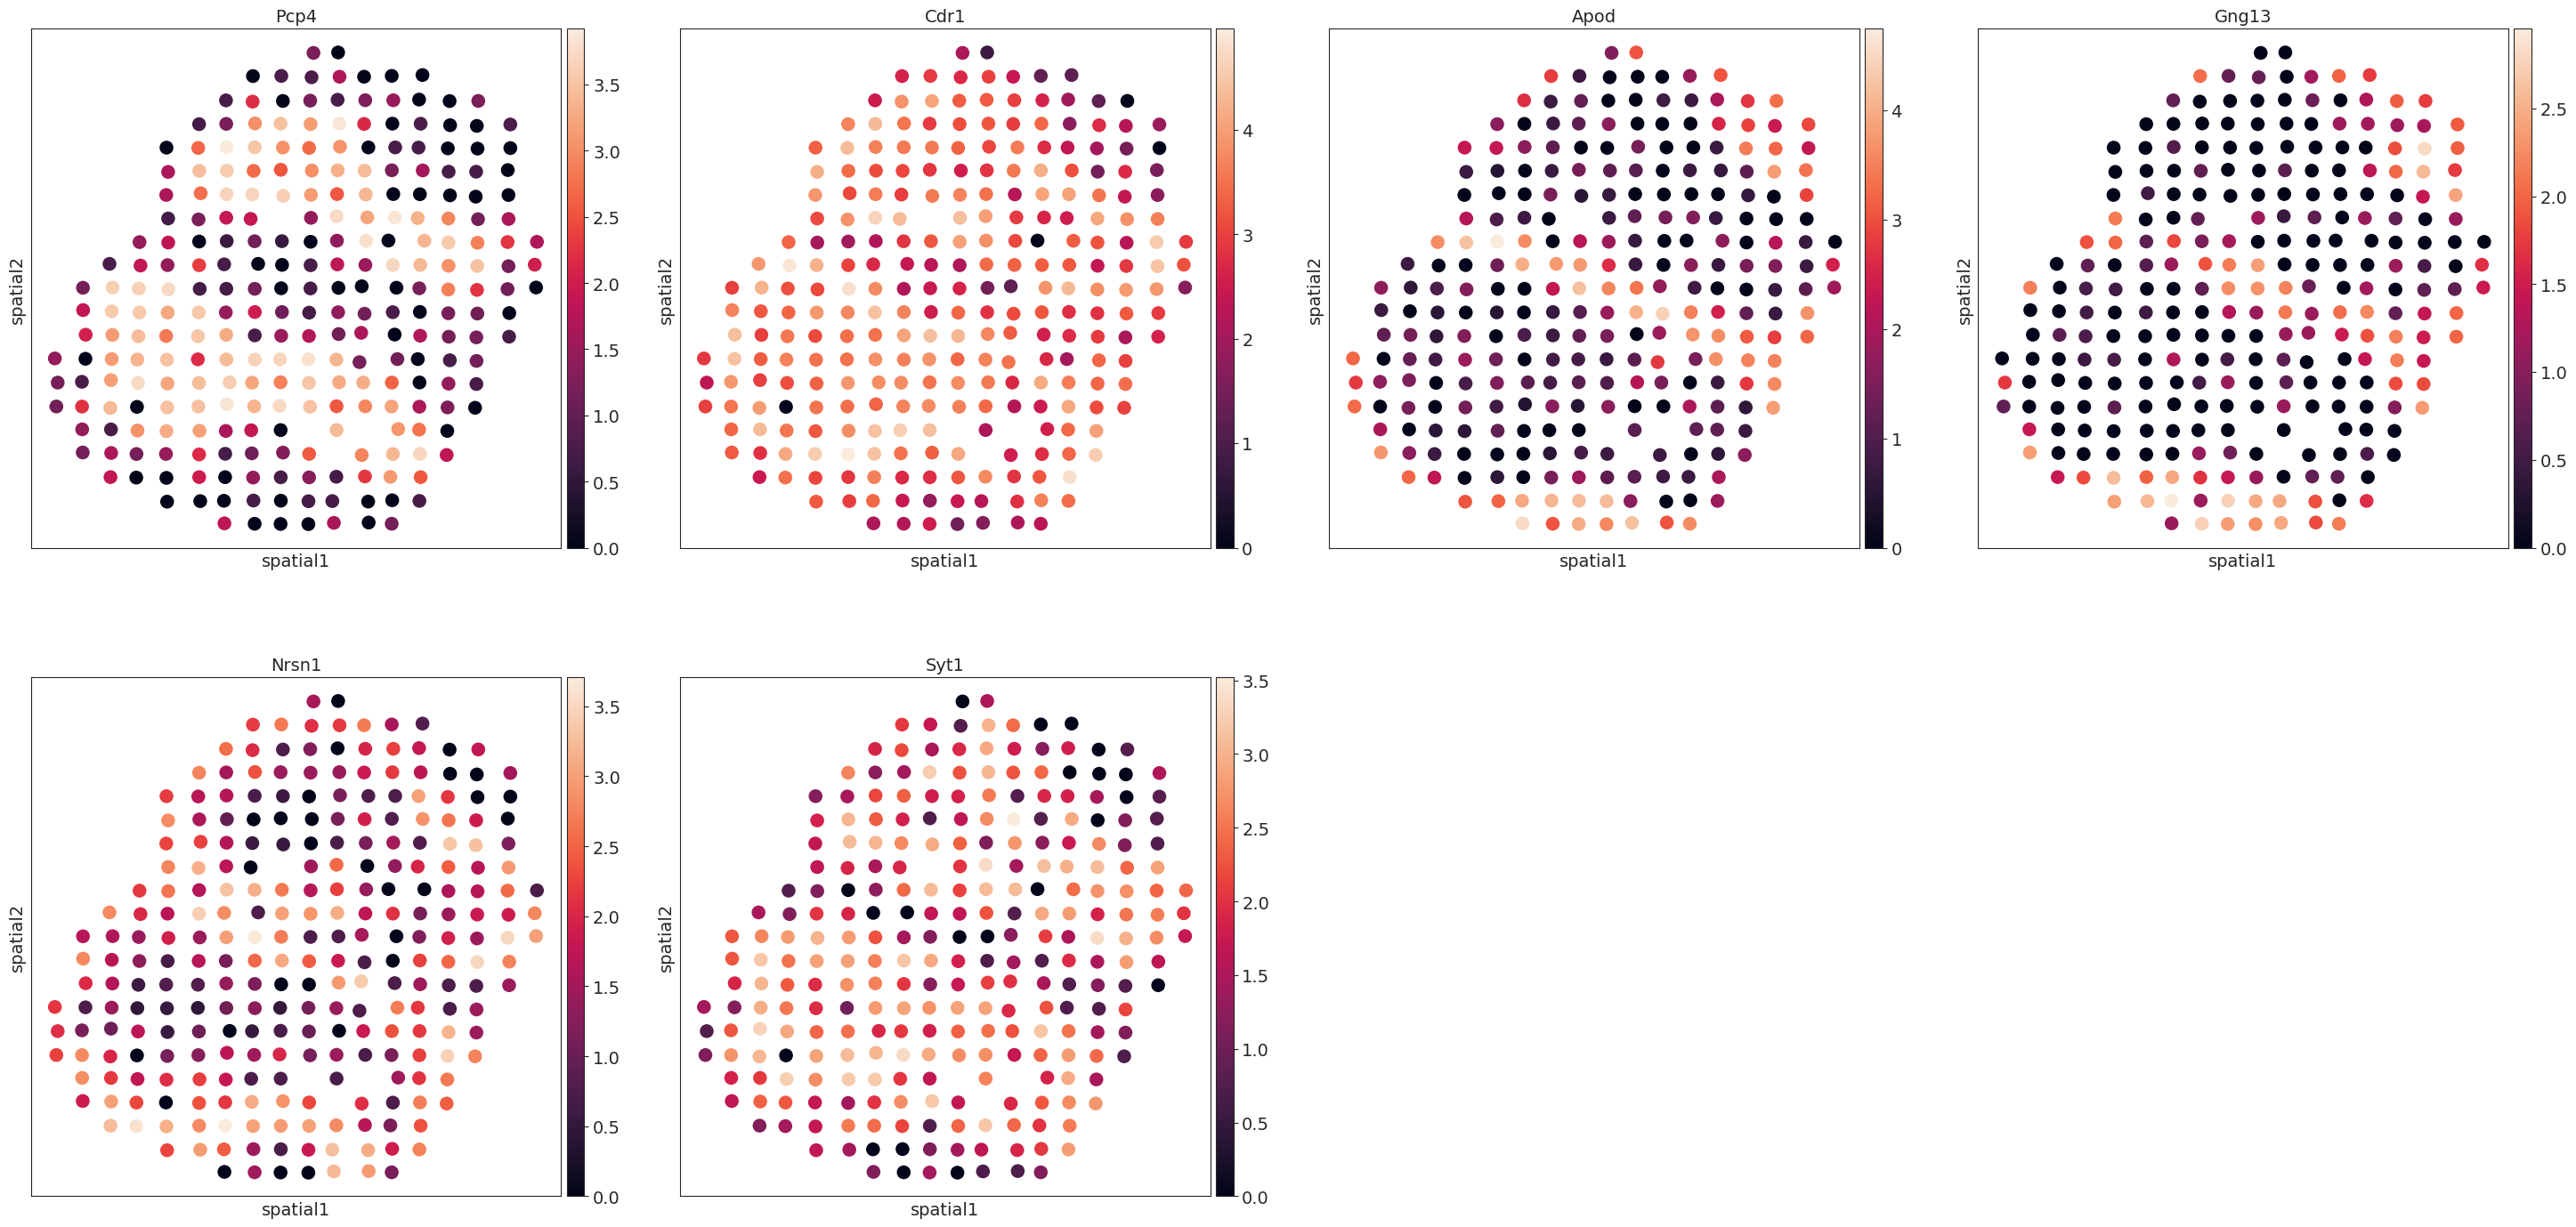

In [47]:
# plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.embedding(adata, basis='spatial', color=marker_genes,size=500,add_outline=False)
